<a href="https://colab.research.google.com/github/swathi27111999/SentimentIntensityAnalyze/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sample_data.csv to sample_data (1).csv
Uploaded file: sample_data (1).csv
                                           text sentiment
0           I love this product! It's amazing 😍  Positive
1  Worst experience ever. Totally disappointed!  Negative
2                I'm so happy with the service!  Positive
3       This made me angry. Never buying again!  Negative


<ipython-input-5-060647d6215a>:19: ParserWarning: Skipping line 4: expected 2 fields, saw 3

  df = pd.read_csv(filename, on_bad_lines='warn')  # Warn about bad lines but continue


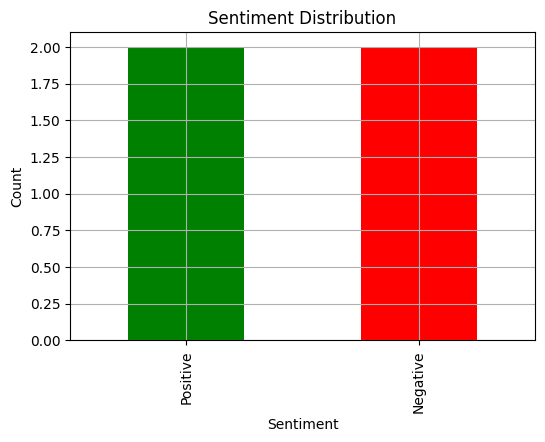

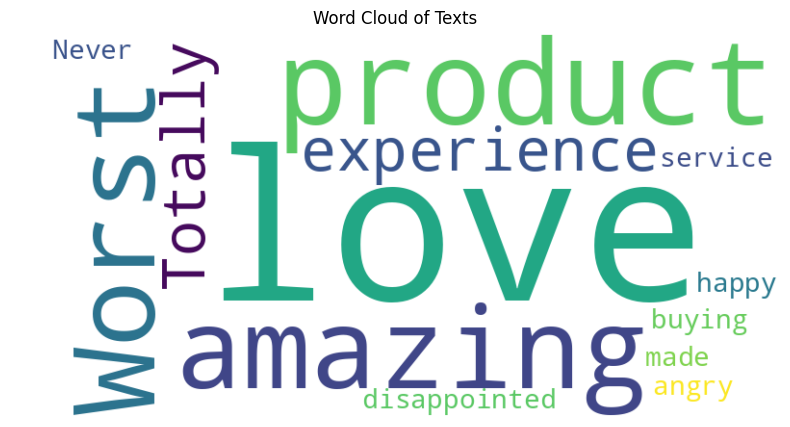

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sentiment results saved and downloaded as 'sentiment_results.csv'.


In [ ]:
# Step 1: Install Required Libraries
!pip install vaderSentiment wordcloud

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from google.colab import files

# Step 3: Upload Your CSV File
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Step 4: Load CSV File
# Try to read the CSV file, handling bad lines
try:
    df = pd.read_csv(filename, on_bad_lines='warn')  # Warn about bad lines but continue
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # If the error persists, try skipping bad lines
    print("Trying to skip bad lines...")
    df = pd.read_csv(filename, on_bad_lines='skip')  # Skip bad lines completely
# Step 5: Check for 'text' column or ask user
if 'text' not in df.columns:
    print(f"Available columns: {list(df.columns)}")
    text_col = input("Enter the name of the column containing text: ")
else:
    text_col = 'text'

# Remove rows where text is missing
df = df.dropna(subset=[text_col])

# Step 6: Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['compound'] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df['sentiment'] = df['compound'].apply(get_sentiment)

# Step 7: Show the Result
print(df[[text_col, 'sentiment']].head())

# Step 8: Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Step 9: WordCloud (Optional)
all_text = ' '.join(df[text_col].astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Texts")
plt.show()

# Step 10: Save Results to CSV (Optional)
df.to_csv('sentiment_results.csv', index=False)
files.download('sentiment_results.csv')
print("Sentiment results saved and downloaded as 'sentiment_results.csv'.")
